In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

In [44]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


To learn the dimensions of your dataset use the *shape* command 

In [ ]:
dataset.shape

(768, 9)

To find out only the number of rows (observations) use the *len* command or *shape[0]*

In [ ]:
len(dataset)

768

In [ ]:
dataset.shape[0]

768

To list the names of the variables use the *columns* command.

In [ ]:
dataset.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

If you want it names of columns to be displayed as a list type rather than index type use *columns.tolist()*

In [ ]:
dataset.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

To learn about the types of our variables us the 
*dtypes* command

In [ ]:
dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

To learn summary statistics and inspect the variables run the *describe* command

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The variable "Outcome" takes the value of 1 if someone is Diabetes positive and zero otherwise. Its type should not be integer. Change it to Category by using the *astype* .

In [45]:
dataset["Outcome"] = dataset["Outcome"].astype('category')
dataset.dtypes

Pregnancies                    int64
Glucose                        int64
BloodPressure                  int64
SkinThickness                  int64
Insulin                        int64
BMI                          float64
DiabetesPedigreeFunction     float64
Age                            int64
Outcome                     category
dtype: object

To make nicer charts and plots create a new variable 'Outcome2' that substitutes the 0/1 records in the Outcome with 'Diabetes Positive' and 'Diabetes Negative'.

In [46]:
dataset['Outcome2'] = dataset['Outcome'].map({True: 'Diabetes Positive', False: 'Diabetes Negative'})

In [47]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Outcome2
0,6,148,72,35,0,33.6,0.627,50,1,Diabetes Positive
1,1,85,66,29,0,26.6,0.351,31,0,Diabetes Negative
2,8,183,64,0,0,23.3,0.672,32,1,Diabetes Positive
3,1,89,66,23,94,28.1,0.167,21,0,Diabetes Negative
4,0,137,40,35,168,43.1,2.288,33,1,Diabetes Positive


Use describe once again to have a closer look at your data. Do any values of the variables raise questions? (e.g. zero values for BMI or Glucose)

In [49]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Build the histograms of your variables to see how the variables' values are distributed. 
Notice the zero values for Variables like BMI, Glucose, Blood Pressure, Skin Thickness.

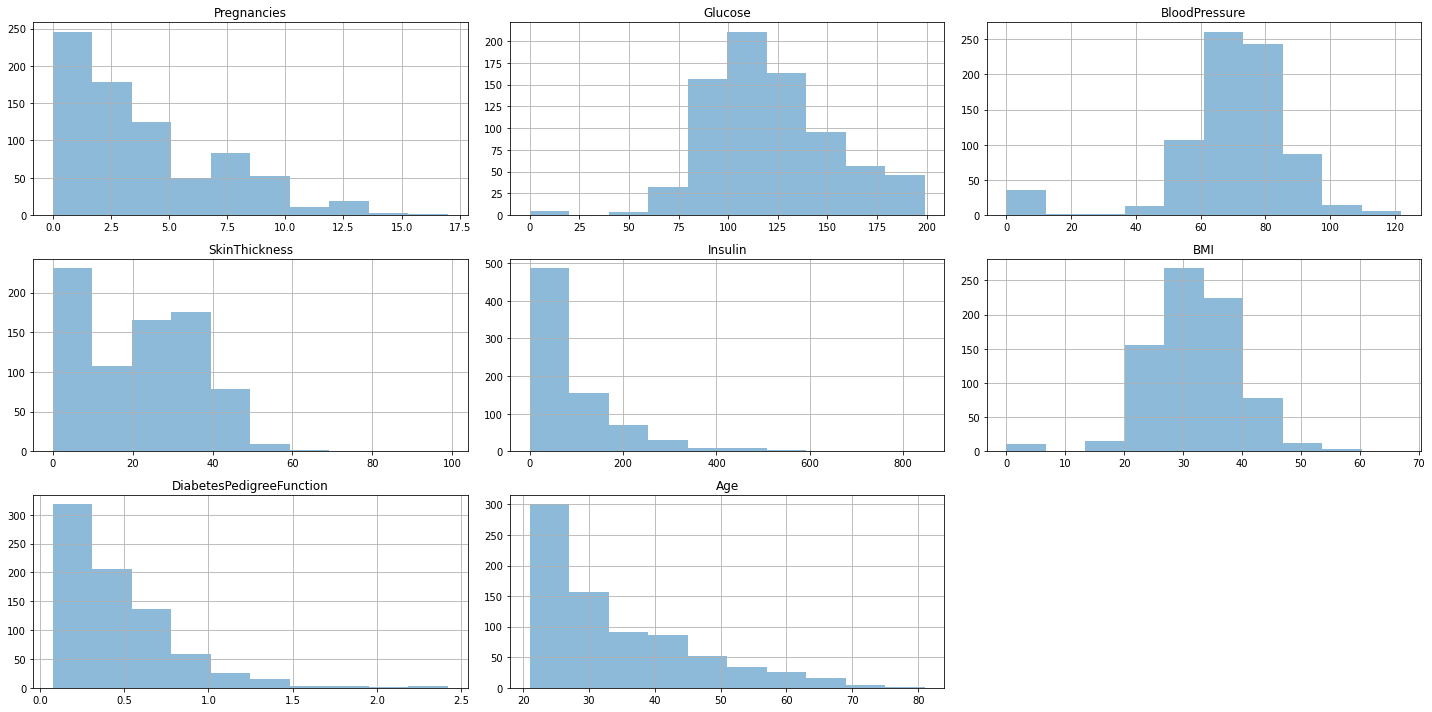

In [50]:
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()

Replace the zero values for the four variables for which these values are probably missing values with 'NaN'. Do not replace with means right away, because the means will be computed before replacing the zeroes with NaN and thus will be skewed.

In [51]:
dataset['Glucose']=dataset['Glucose'].replace(0, np.nan)
dataset['BloodPressure']=dataset['BloodPressure'].replace(0, np.nan)
dataset['SkinThickness']=dataset['SkinThickness'].replace(0, np.nan)
dataset['BMI']=dataset['BMI'].replace(0, np.nan)

Check if zero values in relevant variables dissapeard by graphing again the histograms  

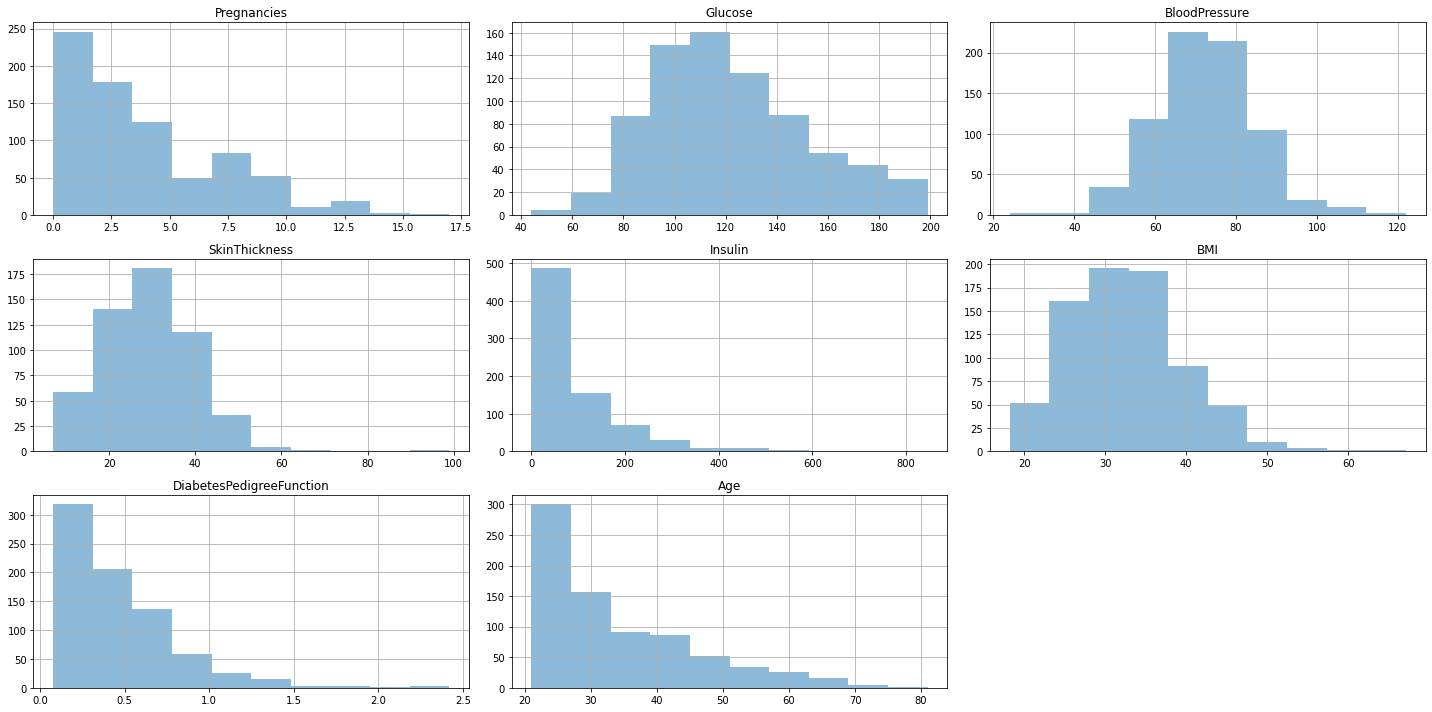

In [62]:
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()

Another way to check if there are any zero values left in relevant variables

In [58]:
(dataset['Glucose'] == 0).sum()

0

In [59]:
(dataset['BloodPressure'] == 0).sum()

0

In [60]:
(dataset['SkinThickness'] == 0).sum()

0

In [61]:
(dataset['BMI'] == 0).sum()

0

Now inspect once again the statistics of variables after zero values have been removed. Check how min, mean, medians have changed.

In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


Before deciding what values to enter instead of the NaN values check for skewness. Decide if mean or median is apropriate, or drop observations with NaN alltogether

In [63]:
stats_df=dataset.describe()
stats_df.loc['range'] = stats_df.loc['max'] - stats_df.loc['min']
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,763.000000,733.000000,541.000000,768.000000,757.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,79.799479,32.457464,0.471876,33.240885
std,3.369578,30.535641,12.382158,10.476982,115.244002,6.924988,0.331329,11.760232
min,0.000000,44.000000,24.000000,7.000000,0.000000,18.200000,0.078000,21.000000
25%,1.000000,99.000000,64.000000,22.000000,0.000000,27.500000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,29.000000,30.500000,32.300000,0.372500,29.000000
75%,6.000000,141.000000,80.000000,36.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000
range,17.000000,155.000000,98.000000,92.000000,846.000000,48.900000,2.342000,60.000000
skewness,0.901674,0.530989,0.134153,0.690619,2.272251,0.593970,1.919911,1.129597


In [ ]:
dataset.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

None of the variables that contain NaN are highly skewed (-1> skew >1) so go ahead and fill in for the NaN values with respective variables' means

In [65]:
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mean())




The second value of SkinThickness was NaN, check if the value was replaced with the mean of SkinThickness by looking at the mean and printing the variable to check the second row 

In [66]:
dataset.loc[:, 'SkinThickness'].mean()

29.153419593345607

In [67]:
print(dataset[['SkinThickness']])

     SkinThickness
0         35.00000
1         29.00000
2         29.15342
3         23.00000
4         35.00000
..             ...
763       48.00000
764       27.00000
765       23.00000
766       29.15342
767       31.00000

[768 rows x 1 columns]


Inspect the histograms after all necessary changes have been made to variables. Note things such as the distribution shapes, how dispersed they are, how skewed they are, etc.

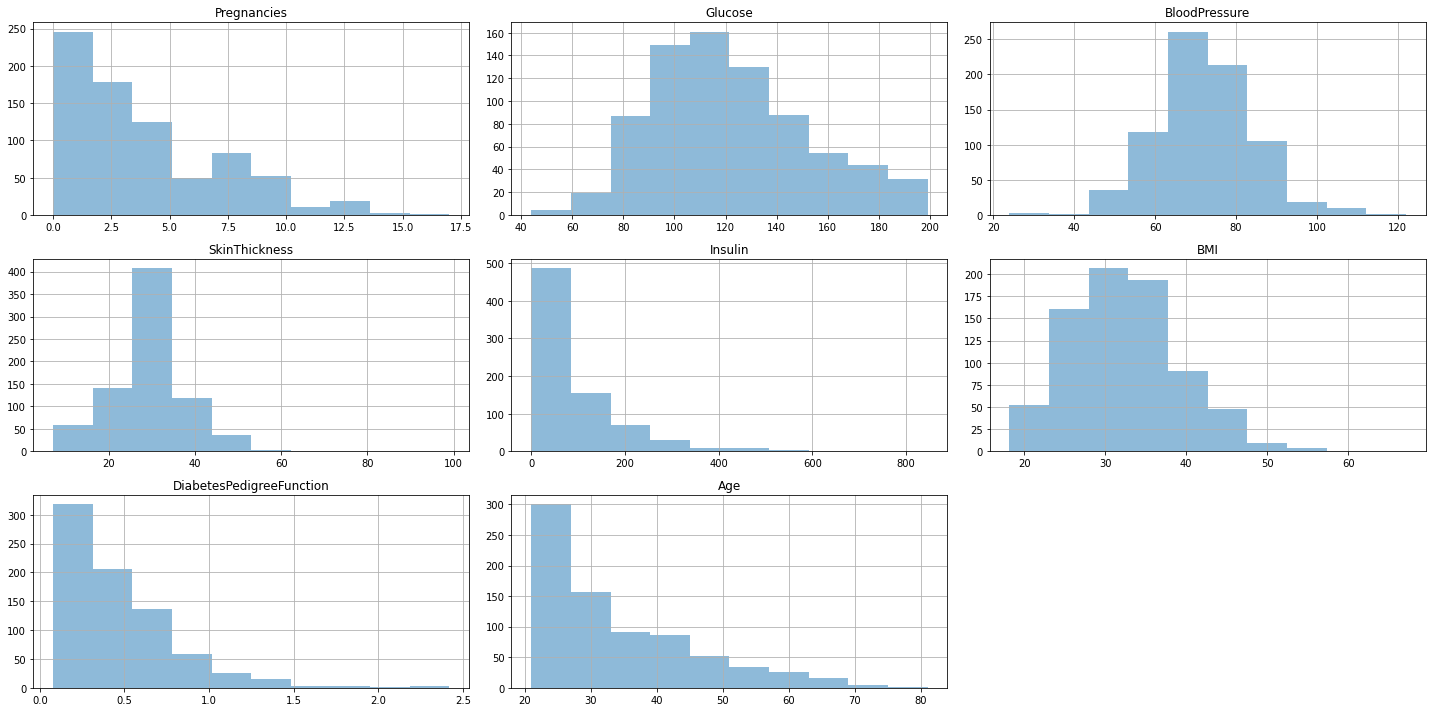

In [70]:
dataset.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()

Check out if the means of the variables differ a lot for those with diabetes and those with no diabetes

In [76]:
dataset.groupby('Outcome2').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome2,,,,,,,,
Diabetes Negative,3.298000,110.710121,70.935397,27.768651,68.792000,30.888434,0.429734,31.190000
Diabetes Positive,4.865672,142.165573,75.147324,31.736944,100.335821,35.384757,0.550500,37.067164


To check other statistics differentiated for those with and without diabetes use the *agg* command

In [77]:
dataset.groupby('Outcome2').agg(['mean', 'median', 'min',  'max', 'skew'])

Pregnancies                 ...    Age                  
                         mean median min max  ... median min max      skew
Outcome2                                      ...                         
Diabetes Negative    3.298000      2   0  13  ...     27  21  81  1.571609
Diabetes Positive    4.865672      4   0  17  ...     36  21  70  0.581646

[2 rows x 40 columns]

You can check out whether the distributions of variables differ for those with diabetes and without

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfe36c3c50>,
      dtype=object)

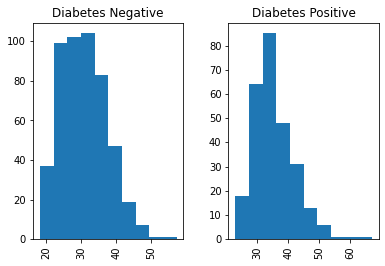

In [78]:
dataset['BMI'].hist(by=dataset['Outcome2'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfec1c1190>,
      dtype=object)

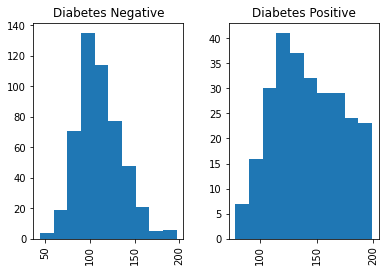

In [79]:
dataset['Glucose'].hist(by=dataset['Outcome2'])


It is difficult to infer if the distributions and the summary statistics differ for those with diabetes versus those without, so lets use box plots instead. Box plots will give you a better understanding about relevant memoments of the distributions for diabetes positive versus negative as they are great when one needs to compare two or more distributions.
Be aware that you have to indicate that the plots should not share the y axis as the units of measurement are all different for different variables. For that use sharey=False and indicate 8 different axes as shown below.

Inspect the box plots, note such things as their position (is one distribution higher placed than the other? what does it mean), compare their meadians, how dispersed they are by looking at their interquantile ranges, wiskers, and are there any/many outliers (remeber when modeling data, you will have to decide what to do with the outliers, so notice things like - how many outliers you have, but more importantly how extreme they  - extreme outliers will most probably have to be dealt with when cleaning the data).

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/boxplot.py:391: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
  **kwds,
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python

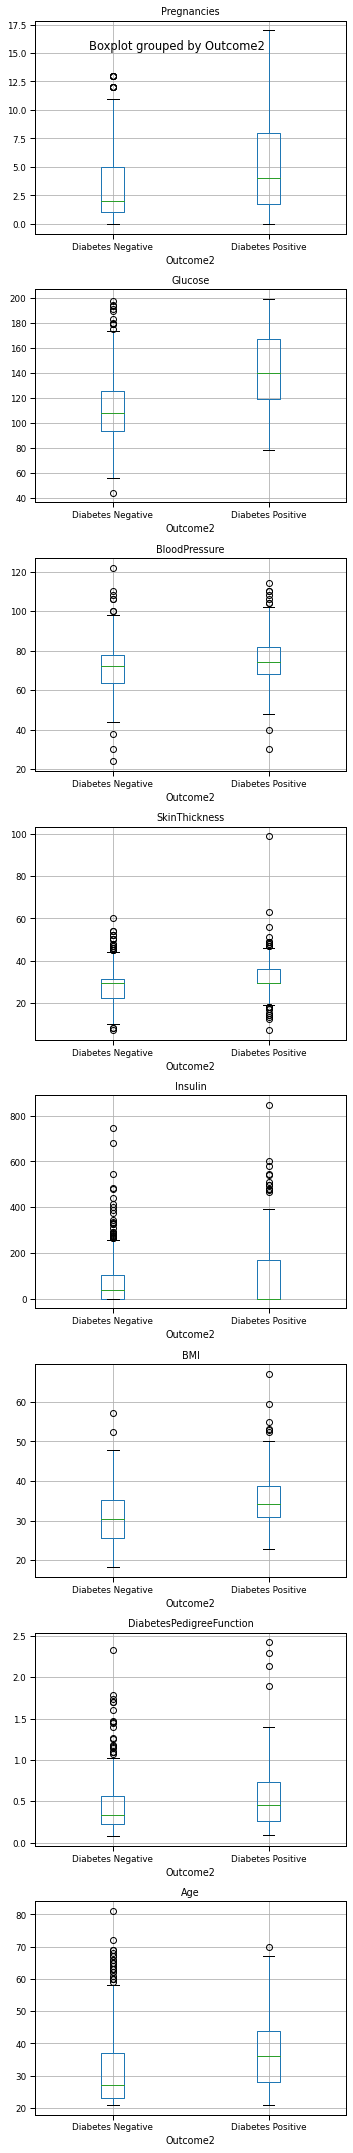

In [89]:
fig, axs = plt.subplots(8, figsize=(5,  30), sharey=False)
dataset.boxplot(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age'],
                'Outcome2', axs)
plt.tight_layout()


**NOW LETS MOVE TO CORRELATIONS BETWEE OUR VARIABLES**

I first plotted the BMI against Outcome2, but since Outcome2 is not an interval variable, these is nothing interesting a scatter plot will show us

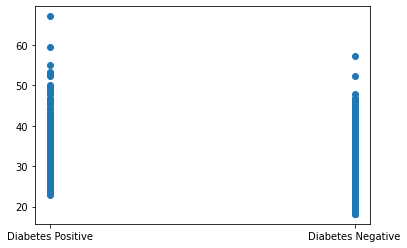

In [81]:
plt.scatter(dataset.Outcome2, dataset.BMI)

Let's check other variable correlations, for example Glucose and BMI. From the scatter plot below it doesn't look like there is a strong correlation between the two.

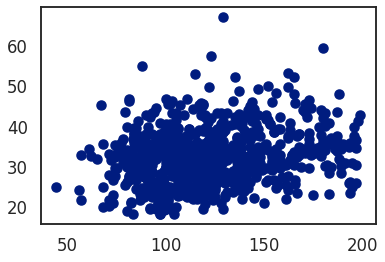

In [ ]:

plt.scatter(dataset.Glucose, dataset.BMI)



Maybe there is some correlations between BMI and Blood Pressure, but it's not very obvious

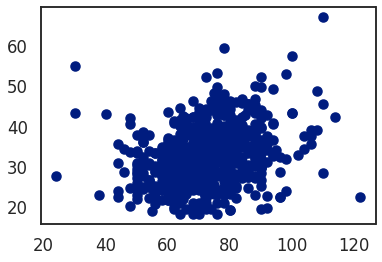

In [ ]:
plt.scatter(dataset.BloodPressure, dataset.BMI)

There seems to be a positive correlations between Skin Thickness and BMI

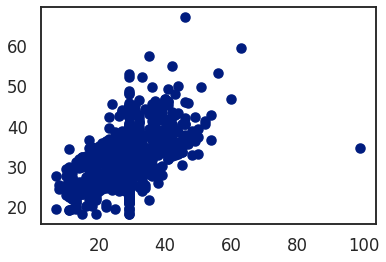

In [ ]:
plt.scatter(dataset.SkinThickness, dataset.BMI)

To make the plot look nicer and have the axes automatically appear on the plot you can use the scatterplot from the seaborn library 

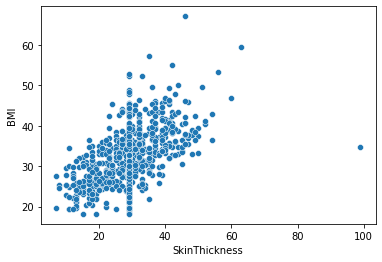

In [86]:
import seaborn as sns
sns.scatterplot(x="SkinThickness", y="BMI", data=dataset);

To see the correlation between BMI and SkinThickness you can compute the variance covariance matrix for the two variables. The covariance is positive, so there is a positive relationship between the two.
Note: If you want just the covariance coefficient use the covariance function from the statistics library

In [82]:
	
np.cov(dataset.BMI, dataset.SkinThickness)

array([[47.26770578, 32.78200663],
       [32.78200663, 77.28065994]])

Because we can't infer much about the strength of the correlation between the two variables from covariance let's compute the correlation coefficient instead.
Looking at the coefficient below one can conclude that there is some correlation between the two, but not super strong. 

In [83]:
np.corrcoef(dataset.BMI, dataset.SkinThickness)

array([[1.        , 0.54239773],
       [0.54239773, 1.        ]])

You can inspect that variance covariance matrix for all variables to see whether the variables have positive corelations or negative. However you cannot judge on the strength of these relationships.

In [84]:
dataset.cov()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,11.354056,13.118128,8.499282,2.458283,-28.555231,0.499584,-0.037426,21.570620
Glucose,13.118128,926.346983,80.394788,51.636823,1161.282727,48.324859,1.382151,95.401356
BloodPressure,8.499282,80.394788,146.321591,20.503705,-65.280466,23.391407,-0.011075,46.175523
SkinThickness,2.458283,51.636823,20.503705,77.280660,114.454403,32.782007,0.294084,13.219905
Insulin,-28.555231,1161.282727,-65.280466,114.454403,13281.180078,146.395431,7.066681,-57.143290
BMI,0.499584,48.324859,23.391407,32.782007,146.395431,47.267706,0.349435,2.063312
DiabetesPedigreeFunction,-0.037426,1.382151,-0.011075,0.294084,7.066681,0.349435,0.109779,0.130772
Age,21.570620,95.401356,46.175523,13.219905,-57.143290,2.063312,0.130772,138.303046


We can take a look at how variables vary together by building scatter plots for each pair of variables.
The only two relatively obvious corelations that come out of the scatter plots are those between 1)Glucose and Insulin and 2) BMI and Skin Thickness

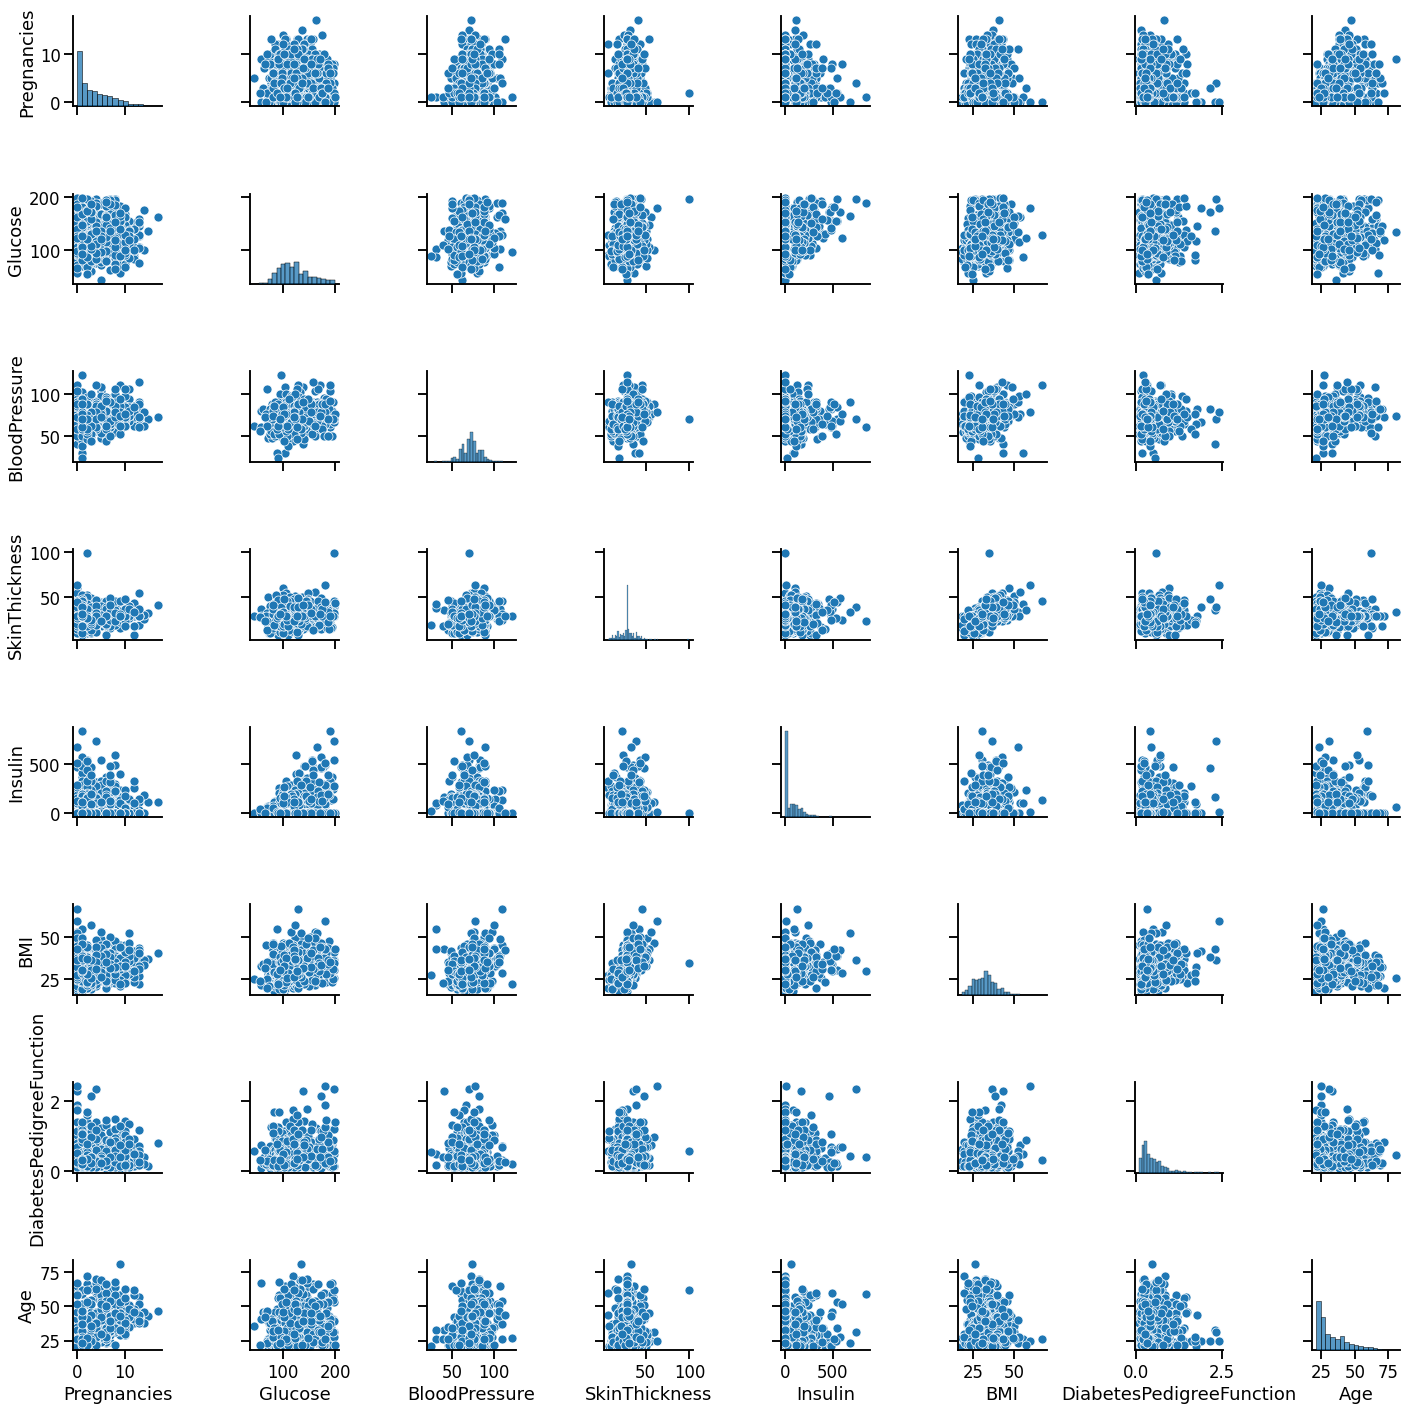

In [87]:
sns.set_context('talk')
sns.pairplot(dataset);

Add hue='Outcome2' to have the data points that belong to those diagnosed with diabetes in orange and for those with no diabetes in blue.
Looking at the plot we see some noise, especially for the Pregnacies variable. The obvious segregation can be made for the Glucose variable -- the orange dots seems to be higher than the blue dots, which suggests that glucose levels are elevated for those with diabetes (not surprising).
We do see some segregation for the other variables as well, which would imply that these variables have some connections to diabetes, however here we see the data only in two dimensions and it is difficult to say a lot. The correlations seem to be more complex where maybe combinations of tree variables would give us a better picture (eg. BMI alone may not be a good predictor for diabetes, but BMI and a high value of Diabetes Pedigree function together could predict diebestes - this is only an example though and futher investigation would be required to conclude better).

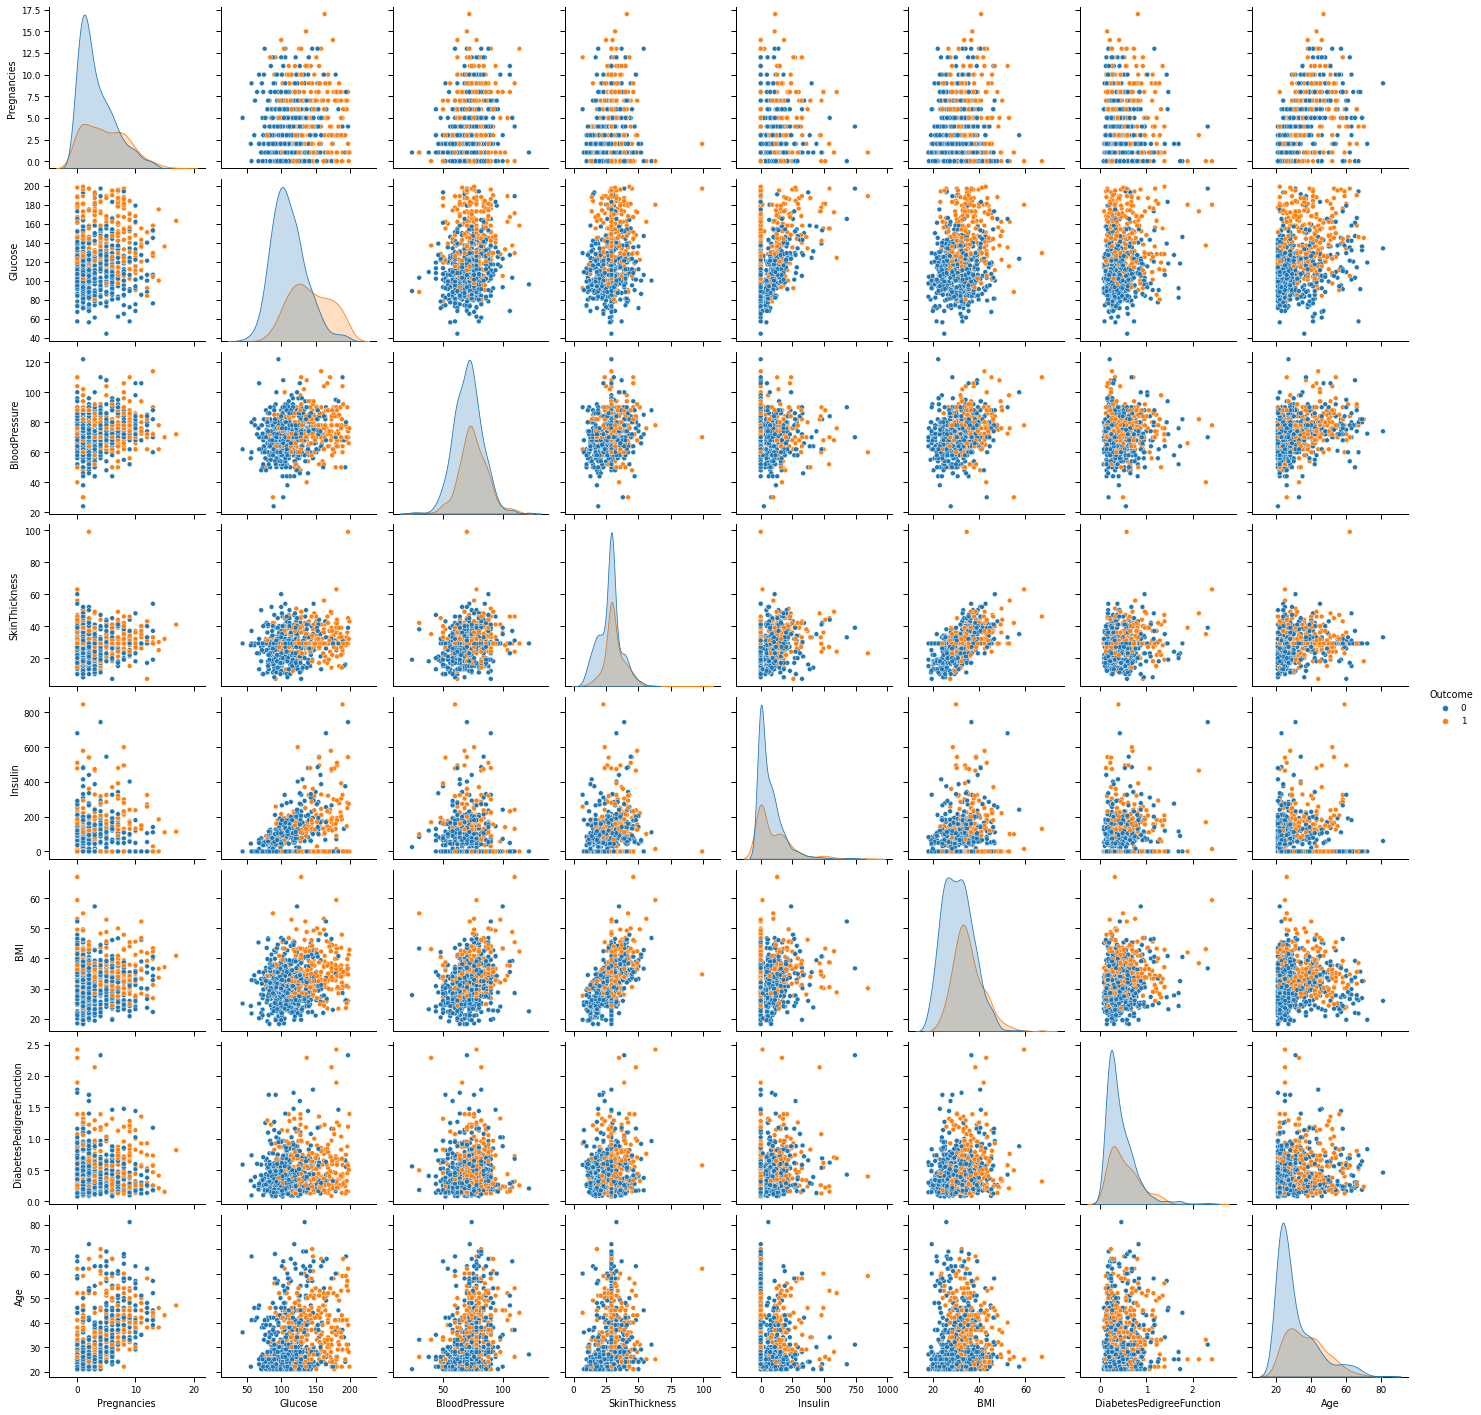

In [88]:
sns.set_context('paper')
sns.pairplot(dataset, hue='Outcome2');

Heatmaps are great instruments to inspect the correlations between variables in a two dimensional space.

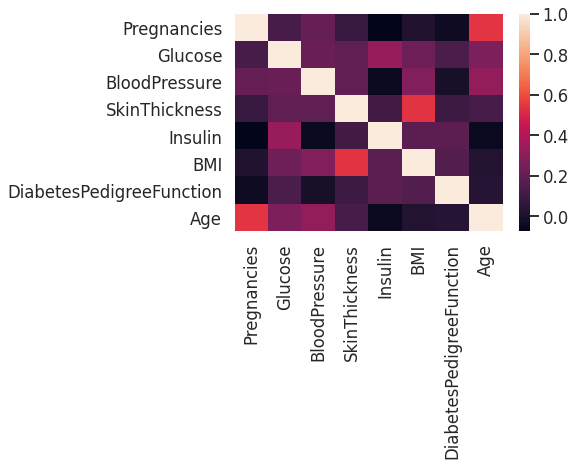

In [ ]:

sns.heatmap(corr)




Let's make the heat map nicer.

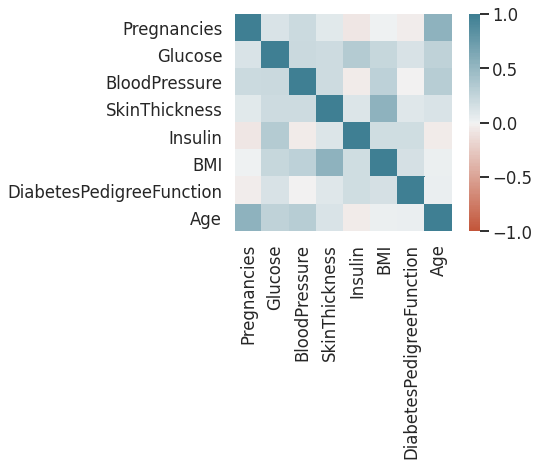

In [ ]:
sns.heatmap(corr, vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(20, 220, n=200),
             square=True)

You can also change the angle of the x axis ticks.

The heatmaps tell you how two variables are correlated. The color tells about the sign of the correlation and the intensity about the strength of the correlation.
The strongest correlations seem to be between Age and Pregnacies, SkinThickness and BMI and somewhat Insulin and Glucose. The heatmap confirms our earlier conclusions.

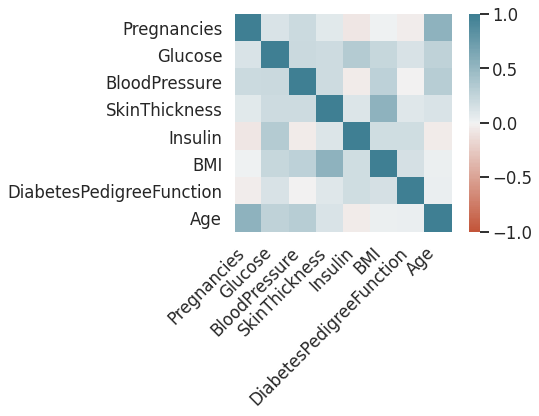

In [ ]:
corr = dataset.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);